In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from six import StringIO
import warnings
warnings.filterwarnings('ignore')
# Montar Google Drive:
from google.colab import drive
drive.mount('/content/drive')
DIR_TEMP = '/content/drive/MyDrive/Colab Notebooks/diabetes_dataset.csv'
df= pd.read_csv(DIR_TEMP)

Mounted at /content/drive


##**1)** MOSTRAR DIMENSIONES Y PRIMERAS FILAS

In [ ]:
print('Las dimensiones de la matriz son:',df.shape)
df.head(4)

Las dimensiones de la matriz son: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


##**2)**EL NOMBRE DE LAS COLUMNAS

In [ ]:
print('El nombre de las columnas:',df.columns)

El nombre de las columnas: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


##**3)** INFORMACIÓN DE LAS COLUMNAS

In [ ]:
print('La información sobre las columnasd de la matriz:')
df.info()

La información sobre las columnasd de la matriz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##**4)**DISTRIBUCIÓN DE LA VARIABLE DE SALIDA Y DESPUÉS LAS DE ENTRADA

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

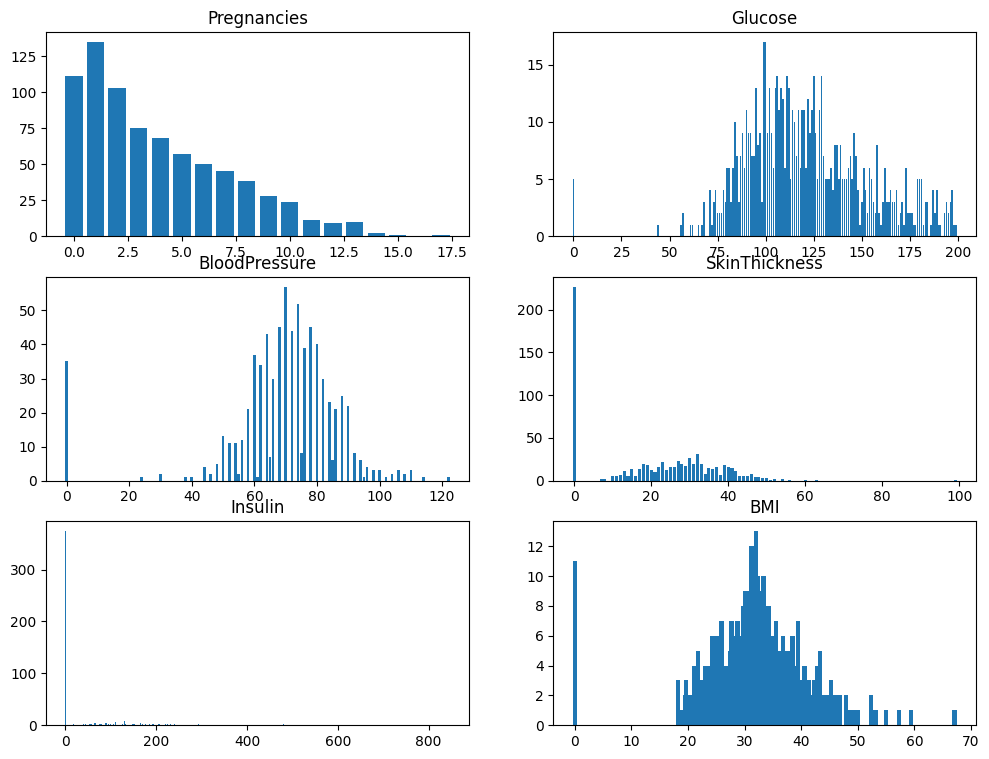

In [ ]:
fig, ejes = plt.subplots(3,2,figsize=(12,9))
for i in range(3):
  for j in range(2):
    col = i*2 + j
    indice  = df[df.columns[col]].value_counts().index
    valores = df[df.columns[col]].value_counts().values
    ejes[i][j].bar(indice, valores)
    ejes[i][j].title.set_text(df.columns[col])

##**5)**OBTENCIÓN DE LAS VARIABLES DE ENTRADA

In [ ]:
x=df.drop(['Outcome'], axis=1) #utilizo drop para que me excluya outcome, y con axis=1 le especifico que es una columna
y=df['Outcome']
print('Las dimensiones de las entradas son:', x.shape)
print('Las dimensiones de Outcome es:', y.shape)

Las dimensiones de las entradas son: (768, 8)
Las dimensiones de Outcome es: (768,)


##**6)**Obtención de los conjuntos de entramiento y validación

In [ ]:
#train_test_split nos sirve para definir el conjunto de datos que pertenecen al entrenamiento y al de validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=2) #random_state es para crear una semilla
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


##**7)**CREAR EL CLASIFICADOR Y ENTRENARLO

In [ ]:
DT_classifier = DecisionTreeClassifier( criterion= 'entropy', max_depth= 3, min_samples_split= 10 )
#criterion puede ser gini/entropy
#max_depth es para la forma de podar
#min_samples_split número mínimo de muestras un nodo debe contener para considerar la división

In [ ]:
DT_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

##**8)**Obtener la predicción para el conjunto de validación

In [ ]:
y_pred = DT_classifier.predict(x_test)

##**9)**Mostrar la matriz de confusión de x_test

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[88, 21],
       [20, 25]])

In [ ]:
print('Los verdaderos positivos son:', cm[1,1])
print('Los verdaderos negativos son:',cm[0,0])
print('Los falsos positivos son:', cm[0,1])
print('Los falsos negativos son:', cm[1,0])

print(['VN','FP'])
print(['FN','VP'])

Los verdaderos positivos son: 25
Los verdaderos negativos son: 88
Los falsos positivos son: 21
Los falsos negativos son: 20
['VN', 'FP']
['FN', 'VP']


##**10)** Calcular la exactitud con sklearn

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)  #proporcion de predicciones correctas
# es decir en este caso prefdijo correctamente el 73% de los datos

Accuracy: 0.7337662337662337


##**11)** Evaluación con metrics.classification_report.

In [ ]:
#evalua el rendimiento de un modelo de clasificación

report = classification_report(y_test, y_pred)
print(report)

#precisión->proporción de predicciones positivas correctas
#Recall-> proporción de predicciones positivas que fueron correctamente clasificadas
#FI-score->combina ambos indicadores en uno solo (media ponderada)
#support-> muestra el número de muestras en cada clase

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.54      0.56      0.55        45

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.74      0.73      0.73       154



##**12)** Predecir la salidad introduciendo unos datos de entrada

In [ ]:
prueba= np.array([[6,148,72,35,112,33.6,0.627,50]])
y_outcome = DT_classifier.predict(prueba)
print("Predecir la salida:", y_outcome[0])

Predecir la salida: 1


##**13)** Ver el árbol de decisión

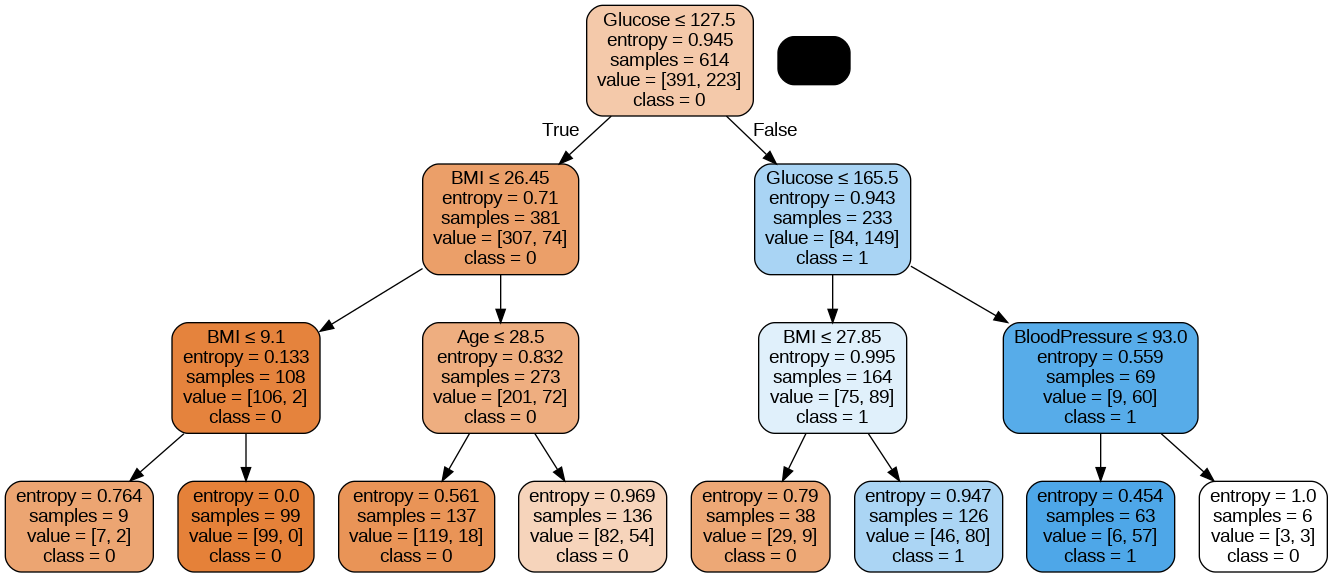

In [ ]:
# escribir aquí la variable en la que se guardó el clasificador (DecisionTreeClassifier(...)):
arbol_clasificador = DT_classifier
# Nombres de las columnas de entrada en el mismo orden del dataframe y sin la columna objetivo:
nombres_columnas = (['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# Estas instrucciones no se deben cambiar:
dot_data = StringIO()
export_graphviz(arbol_clasificador, out_file=dot_data,filled=True, rounded=True,
 special_characters=True, feature_names=nombres_columnas,
 class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())